<a href="https://colab.research.google.com/github/Bortak10/POSI/blob/main/Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2

In this tutorial, you will explore and learn how to use key Python libraries such as **NumPy**, **Pandas**, and **Matplotlib**. Additionally, you will learn how to import datasets from files as well as from the web.

## Introduction

### Importing external library
You only need to import library **once** at the beginning of the execution chain.

In [ ]:
import numpy as np

### NumPy

NumPy is used for working with arrays and performing numerical operations.

#### Basic operations

In [ ]:
import numpy as np

# python array
pyarr = [1, 2, 3, 4, 5]
print(pyarr)

# numpy array
arr = np.array([1, 2, 3, 4, 5])
print(arr)

# Basic operations
print("Mean:", np.mean(arr))
print("Standard Deviation:", np.std(arr))
print("Sum:", np.sum(arr))

[1, 2, 3, 4, 5]
[1 2 3 4 5]
Mean: 3.0
Standard Deviation: 1.4142135623730951
Sum: 15


#### Vectors and matrices

In [ ]:
# Creating NumPy arrays (1D and 2D)
a = np.array([1, 2, 3])            # vector
b = np.array([[1, 2], [3, 4]])     # 2x2 matrix

# Mathematical operations
c = a + 10             # add 10 to each element
d = b * 2              # scalar multiplication
e = a * a              # element-wise multiplication
f = np.dot(a, a)       # dot product (scalar)

# Matrix operations
dot = np.dot(b, b)       # matrix multiplication
transpose = np.transpose(b)    # matrix transpose
inverse = np.linalg.inv([[1, 2], [3, 4]])  # matrix inverse (if invertible)

print("Matrix b * b:\n", dot, "\n")
print("Transpose of b:\n", transpose, "\n")
print("Matrix inverse of matrix [[1, 2], [3, 4]]:\n", inverse, "\n")

Matrix b * b:
 [[ 7 10]
 [15 22]] 

Transpose of b:
 [[1 3]
 [2 4]] 

Matrix inverse of matrix [[1, 2], [3, 4]]:
 [[-2.   1. ]
 [ 1.5 -0.5]] 



#### Slicing

In [ ]:
# 1d
arr = np.arange(1, 10)
a = arr[2:4]     # Elements from index 2 to 4
b = arr[::2]     # Every second element
c = arr[-2:]     # Last 2 elements
d = arr[::-2]    # Every second element in reverse order

print("a) ", a)  # [3 4]
print("b) ", b)  # [1 3 5 7 9]
print("c) ", c)  # [8 9]
print("d) ", d)  # [9 7 5 3 1]

print()

# 2d
arr2d = np.arange(20).reshape(4, 5) # reshape(rows, columns)
print("Original array:\n", arr2d)

a2d = arr2d[:3, -3:] # top right corner 3x3
b2d = arr2d[2]       # 3rd row

print()
print(a2d)
print(b2d)



a)  [3 4]
b)  [1 3 5 7 9]
c)  [8 9]
d)  [9 7 5 3 1]

Original array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[[ 2  3  4]
 [ 7  8  9]
 [12 13 14]]
[10 11 12 13 14]


#### Performance Comparison – For Loop vs Vectorized Operations

In [ ]:
import numpy as np
import time

n = 1_000_000
a = np.arange(n)
b = np.arange(n)

# Using a for loop
start_loop = time.time()
c_loop = []
for i in range(n):
    c_loop.append(a[i] + b[i])
end_loop = time.time()

# Using vectorized NumPy operation
start_vector = time.time()
c_vector = a + b
end_vector = time.time()

print(f"For loop time: {end_loop - start_loop:.5f} seconds")
print(f"Vectorized time: {end_vector - start_vector:.5f} seconds")

For loop time: 0.36233 seconds
Vectorized time: 0.00372 seconds


### Pandas
Pandas is ideal for handling and analyzing data using dataframes (tables).

In [ ]:
import pandas as pd

# Creating a simple dataframe
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'London']
}
df = pd.DataFrame(data)

print(df)

# Exploring the DataFrame
print("\n Head:\n", df.head())
print("\n Describe:\n", df.describe(include='all'))

      Name  Age      City
0    Alice   25  New York
1      Bob   30     Paris
2  Charlie   35    London

 Head:
       Name  Age      City
0    Alice   25  New York
1      Bob   30     Paris
2  Charlie   35    London

 Describe:
          Name   Age      City
count       3   3.0         3
unique      3   NaN         3
top     Alice   NaN  New York
freq        1   NaN         1
mean      NaN  30.0       NaN
std       NaN   5.0       NaN
min       NaN  25.0       NaN
25%       NaN  27.5       NaN
50%       NaN  30.0       NaN
75%       NaN  32.5       NaN
max       NaN  35.0       NaN


#### Reading from file

The most commonly used function for reading data is `pd.read_csv()` for CSV files.

There are also other formats like `read_excel()`, `read_json()`.

In [ ]:
import pandas as pd

# Reading a CSV file into a pandas DataFrame
df = pd.read_csv('name.csv')

# Display the first 5 rows
print(df.head())

Useful parameters

`skiprows=1`:
- This tells pandas to **skip the first row** when reading the CSV file.
- Typically, `skiprows` is used when the first row contains metadata, extra information, or non-tabular data (like headers in a non-standard position or comments).
- In this case, the first row will not be included in the DataFrame. For example, if the file contains an introductory row or some description at the top, this parameter ensures that it’s ignored when reading the actual data.

`header=None`:
- By default, `read_csv()` assumes that the first row contains **column headers** (the names of the columns).
- By setting `header=None`, you're telling pandas **not to treat any row as column headers**. Instead, pandas will automatically assign numeric column labels (0, 1, 2, etc.).
- This is useful when the CSV file does not have headers or when the header row is not the first row.

In [ ]:
df = pd.read_csv("height_weight_data.csv", skiprows = 1, header=None)

#### Reading files from the web

In [ ]:
import pandas as pd

# URL of the CSV file
url = "https://example.com/path/to/your/file.csv"

# Reading the CSV from the web
df = pd.read_csv(url)

### Matplotlib

#### Basic graph

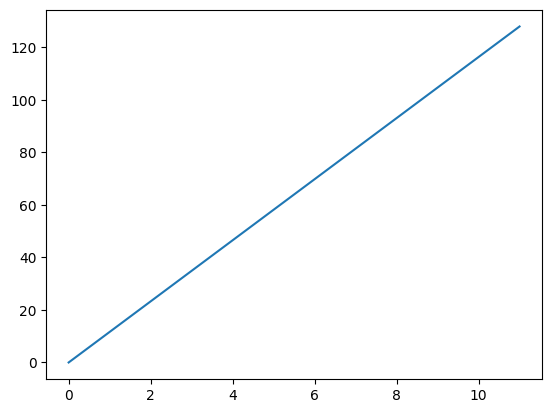

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 11])
ypoints = np.array([0, 128])

plt.plot(xpoints, ypoints)
plt.show()

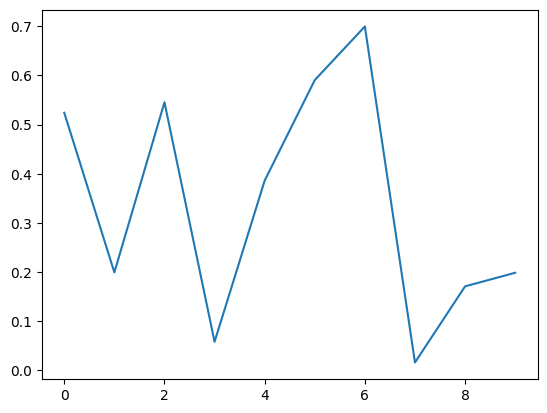

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.random(10)
plt.plot(data)
plt.show()

#### Scatter plot
https://en.wikipedia.org/wiki/Scatter_plot

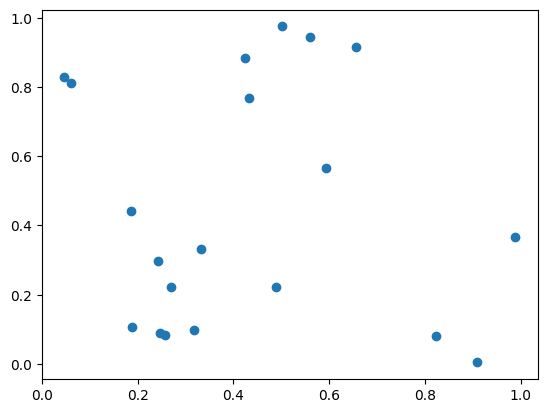

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [np.random.random(20), np.random.random(20)]
plt.scatter(data[0], data[1])
plt.show()

#### Pie chart
https://en.wikipedia.org/wiki/Pie_chart

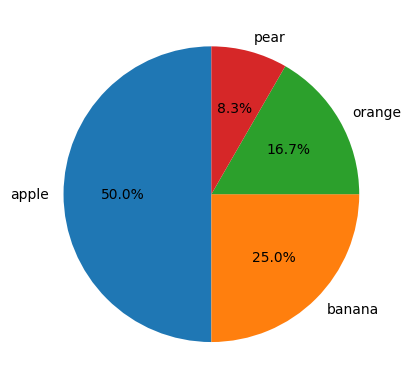

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array(["apple", "banana", "apple", "pear", "banana", "orange", "banana", "apple", "orange", "apple", "apple", "apple"])

unique, counts = np.unique(data, return_counts=True)

plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
plt.show()

#### Box plot
https://en.wikipedia.org/wiki/Box_plot

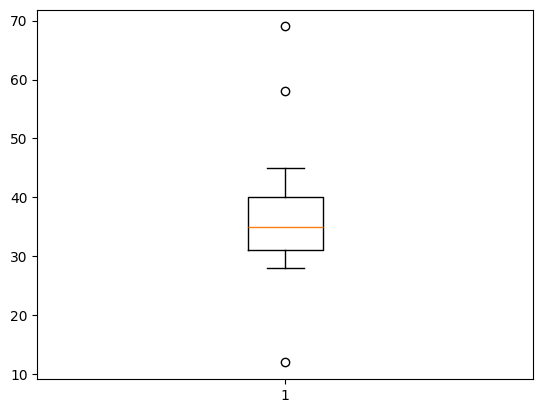

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [12, 30, 31, 35, 37, 40, 32, 33, 34, 41, 38, 28, 45, 31, 36, 58, 69]

plt.boxplot(data)
plt.show()

#### Histogram
https://en.wikipedia.org/wiki/Histogram

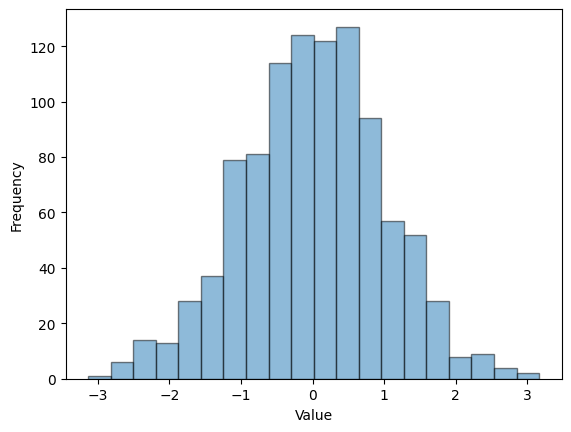

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(1000)

# Plot histogram
plt.hist(data, bins=20, edgecolor='black', alpha=0.5)

# Add labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

## Exercises

#### Exercise 1
In this exercise, you will explain the following statistical terms. For each term:

1. **Define it** in your own words.
2. **Explain how it's calculated** or how it's used.
3. **Provide an example** to illustrate the concept.

---

##### Terms to Explain:

1. **Median**
   - What is the median? How is it found in a data set?
   - Provide an example.
   
2. **Mean (Average)**
   - Define the mean and explain how to calculate it.
   - Provide an example.

3. **Standard Deviation**
   - What does standard deviation measure?
   - Briefly explain how to calculate it and provide an example.

4. **Quartiles (Q1 and Q3)**
   - Define Q1 and Q3. How are they calculated?
   - Give an example using a small data set.

5. **IQR (Interquartile Range)**
   - Define IQR and explain how it’s calculated.
   - Provide an example.

6. **Variance**
   - What is variance, and how is it calculated?
   - Explain the relationship between variance and standard deviation.
   - Provide an example.

1. Median is either exact middle value in a set if the set length is an odd number or the average of two most middle numbers in a set when the length is an even number.
The set has to be ordered from the smallest value to the biggest value

In the set: (1, 2, 5, 7, 8) the median is 5
In the set: (1,2,5,6,7,9) the median is (5+6)/2 = 5.5


2. Mean is the result of adding all values in a set and dividing the sum by the number of values in a set

In the set: (1,4,5,7,8,10) the mean is: (1 + 4 + 5 + 7 + 8 + 10)/6 = 35/6 which equals 5.91


3. Standard deviation measures the spread of the data from the mean. It is also a squared root of variance

To calculate Standard deviation, first we need to calculate the squared differences of all elements and mean, divided by the number of elements - 1

the set: (3,5,6,7,8) has a mean equal: 29/5 = 5,8 so now all the (elements - mean) squared equals 14,8/4 = 3,7 with square root equal = 1,92

1,92 is the standard deviation of this set


4. Q1 and Q3 or in other words lower and upper quartiles are percentiles that allow to equally split the set into 4 equal parts. Q1 marks the point under which the lowest 25% of data falls, Q3 marks the point where the lowest 75% of data falls. Between them there is Q2, which is the median of the set, splitting a set into 2 smaller sets: from smallest value to Q2 and from Q2 to the largest value. To calculate Q1 and Q3 we can simply calculate the means of these smaller sets

In the set: (1,5,6,9,11,13,15,17,18,20,21) the Q2 = 13
as the two smaller datasets are odd, we can take the middle numbers: Q1 = 6 and Q3 = 18


5. IQR is the difference between the Q3 and Q1, which will represent the middle 50% of the data. Usage of it allows to better represent spread of data, as it is not affected by the outliers

Using the previous set (1,5,6,9,11,13,15,17,18,20,21), with Q1 = 6 and Q3 = 18, we simply substract: 18 - 6 = 12, so IQR = 12

6. Variance is simply the squared differences of all elements and mean, divided by the number of elements - 1. The square root of the variance is the standard deviation of the set

Recalling the example with standard deviation:
the set: (3,5,6,7,8) has a mean equal: 29/5 = 5,8 so now all the (elements - mean) squared equals 14,8/4 = 3,7
3,7 is the variance of this set

#### Exercise 2
Generate an array of random 100 numbers.

Calculate the following statistics for the array:
- Median
- Mean
- Standard deviation
- First quartile (Q1)
- Third quartile (Q3)
- Interquartile range (IQR)
- Variance

Print the array and the calculated statistics.

Example result:
```console
[0.17165121 0.61747645 0.39826582 0.4707236  0.61388013 0.2276911
 0.31298085 0.20115937 0.10795451 0.22006963 0.40703735 0.02983642
 0.308904   0.82789731 0.67563344 0.67735212 0.58701252 0.10168223
 0.1964611  0.77288573 0.41698776 0.7372897  0.10721326 0.92445719
 0.00173499 0.53950225 0.27424815 0.04274267 0.31071638 0.06689424
 0.0166482  0.34950876 0.97116423 0.13551993 0.03801114 0.96580299
 0.45665163 0.26293525 0.67950108 0.27331487 0.87291717 0.24241789
 0.65478673 0.77976392 0.30852723 0.49931606 0.74704851 0.63121191
 0.43296676 0.26194879 0.83004086 0.05800895 0.09099496 0.50455262
 0.34092432 0.51825112 0.9072013  0.48224947 0.43095947 0.88140047
 0.97092664 0.62284024 0.32432019 0.69784626 0.68389065 0.83843349
 0.65483523 0.1089709  0.22401504 0.42183869 0.73129921 0.28488844
 0.64106247 0.7949042  0.01754107 0.92714389 0.4125867  0.68234723
 0.24529873 0.04389241 0.93576212 0.59933419 0.59723641 0.48393346
 0.30273359 0.27042282 0.74436857 0.22199391 0.71667345 0.22140033
 0.34149772 0.92076753 0.9442233  0.89750259 0.42759872 0.82726639
 0.8555351  0.01961142 0.03418    0.20652359]
Median: 0.43196311650405067
Mean: 0.46870335005716784
Std: 0.2898530747727577
Q1: 0.2267720839331883
Q3: 0.7025530558853881
IQR: 0.4757809719521998
Variance: 0.08401480495522184
```

In [ ]:
import numpy as np

arr = np.random.randint(1, 1000,size=100)


print(arr)
print("Mean:", np.mean(arr))
print("Median", np.median(arr))
print("Standard Deviation", np.std(arr))
print("Q1", np.quantile(arr, 0.25))
print("Q3", np.quantile(arr, 0.75))
print("IQR", np.quantile(arr, 0.75) - np.quantile(arr, 0.25))
print("Variance", np.var(arr))





[659 548 442 708 566 148 456 340 692 274 228  47 735 831 399 662 403 425
 468 159 454 883 909 685 546 529 624 138 318 195 908 472 445 958 795 796
 627 458 226 990  29 111 663 872 340  34  92 106 402 974 818 729 185  49
  28  36 993 830 675 789 108 470 837 935 672 729 576 417 351 308 502 601
 413 732 811 861 838 655 135  66 286 689 120 339 285 834 190 192 681 136
 291 427 968 632 819 358 930 902 124 253]
Mean: 503.74
Median 471.0
Standard Deviation 286.9116456332855
Q1 268.75
Q3 732.75
IQR 464.0
Variance 82318.2924


#### Exercise 3
Using **NumPy** library.

Create an array with values from 1 to 100.
Then, use this array to create two smaller arrays:
one containing the odd values and the other containing the even values.
Finally, print both arrays to the console.

Expected result:

```python
Odd:
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]
Even:
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96
 98]
 ```

In [ ]:
import numpy as np

arr = np.arange(1, 100)

evenarr = arr[arr % 2 == 0]
oddarr = arr[arr % 2 != 0]

print("Even array:")
print(evenarr)
print("Odd array:")
print(oddarr)

Even array:
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96
 98]
Odd array:
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


#### Exercise 4

Create a 1D **NumPy** array of numbers from 10 to 19.

Slice the array to get:
 - Elements from index 3 to 7
 - Every second element
 - Last 3 elements
 - All elements in reverse order

In [ ]:
import numpy as np
arr = np.arange(10, 20)
print(arr)

a = arr[3:7]
print(a)

b = arr[::2]
print(b)

c = arr[-3:]
print(c)

d = arr[::-1]
print(d)



[10 11 12 13 14 15 16 17 18 19]
[13 14 15 16]
[10 12 14 16 18]
[17 18 19]
[19 18 17 16 15 14 13 12 11 10]


#### Exercise 5

Create a 4x5 array with values from 0 to 19.

Extract using slicing:
 - The second row
 - The third column
 - A subarray of the top-left 2x2 corner
 - A subarray from rows 1 to 3 and columns 2 to 4 (inclusive)

In [ ]:
arr = np.arange(20).reshape(4,5)
print(arr)
print()

a = arr[1]
print(a)
print()

b = arr[:,2]
print(b)
print()

c = arr[:2, :2]
print(c)
print()

d = arr[0:3, 1:4]
print(d)


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[5 6 7 8 9]

[ 2  7 12 17]

[[0 1]
 [5 6]]

[[ 1  2  3]
 [ 6  7  8]
 [11 12 13]]


#### Exercise 6
Write a code that:
1. Loads a CSV file `height_weight_data.csv` containing height and weight data.
2. Skips the first row and assumes there is no header.
3. Extracts the height column.
4. Calculates and prints the following statistics for the height data:
    - Mean
    - Median
    - Minimum and maximum
    - First (Q1) and third (Q3) quartiles
    - Interquartile range (IQR)
5. Creates and displays a box plot of the height data.

Use the **pandas** and **matplotlib** libraries in your code.

Saving height_weight_data.csv to height_weight_data (16).csv
0      65.78
1      71.52
2      69.40
3      68.22
4      67.79
       ...  
195    65.80
196    66.11
197    68.24
198    68.02
199    71.39
Name: 1, Length: 200, dtype: float64
Mean: 67.9498
Median: 67.935
Max: 73.9
Min: 63.43
Q1 66.52250000000001
Q3 69.2025
IQR 2.6799999999999926


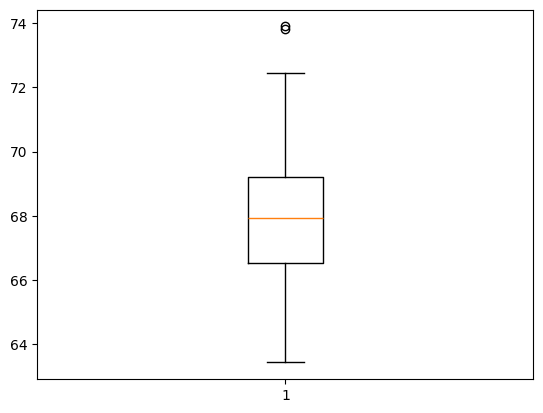

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
files.upload()

df = pd.read_csv('height_weight_data.csv', skiprows = 1, header=None)

print(df[1])
print("Mean:",df[1].mean())
print("Median:", df[1].median())
print("Max:", df[1].max())
print("Min:", df[1].min())
print("Q1", df[1].quantile(0.25))
print("Q3", df[1].quantile(0.75))
print("IQR", df[1].quantile(0.75) - df[1].quantile(0.25))

plt.boxplot(df[1])
plt.show()



#### Exercise 7
Read the CSV file named `datasaurus.csv` into a pandas DataFrame.

Then inspect the data. Retrieve and display names of datasets in the `dataset` column of the DataFrame.

In [184]:
import pandas as pd

from google.colab import files
files.upload()

df = pd.read_csv('datasaurus.csv')

print(df['dataset'])

Saving datasaurus.csv to datasaurus (9).csv
0             dino
1             dino
2             dino
3             dino
4             dino
           ...    
1841    wide_lines
1842    wide_lines
1843    wide_lines
1844    wide_lines
1845    wide_lines
Name: dataset, Length: 1846, dtype: object


#### Exercise 8
Read the CSV file named `datasaurus.csv` into a pandas DataFrame.

For datasets named `dino` and `circle`:
- calculate and display for **x** values:
  - median
  - mean
  - standard deviation
  - variance
- create and display scatter plot for both datasets

Saving datasaurus.csv to datasaurus (58).csv
    dataset        x        y
0      dino  55.3846  97.1795
1      dino  51.5385  96.0256
2      dino  46.1538  94.4872
3      dino  42.8205  91.4103
4      dino  40.7692  88.3333
..      ...      ...      ...
137    dino  39.4872  25.3846
138    dino  91.2821  41.5385
139    dino  50.0000  95.7692
140    dino  47.9487  95.0000
141    dino  44.1026  92.6923

[142 rows x 3 columns]
Mean: 54.26327323943662
Median: 53.3333
Standard Deviation: 16.765142039116785
Variance: 281.06998759176093


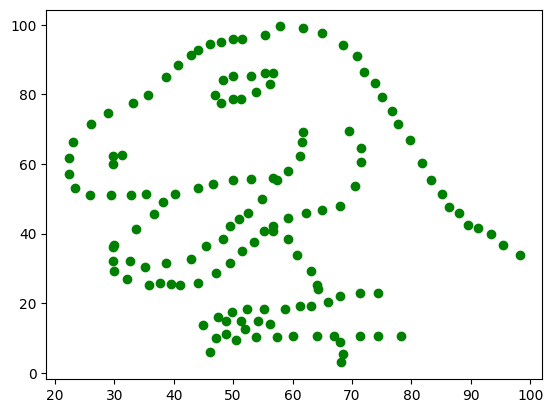


     dataset          x          y
1136  circle  55.993030  79.277264
1137  circle  50.032254  79.013071
1138  circle  51.288459  82.435940
1139  circle  51.170537  79.165294
1140  circle  44.377915  78.164628
...      ...        ...        ...
1273  circle  39.921363  19.701850
1274  circle  84.794278  55.568650
1275  circle  55.662959  83.356480
1276  circle  50.492248  78.997532
1277  circle  51.467101  79.201845

[142 rows x 3 columns]
Mean: 54.267319706173936
Median: 54.0232131774
Standard Deviation: 16.760012659672196
Variance: 280.89802435237226


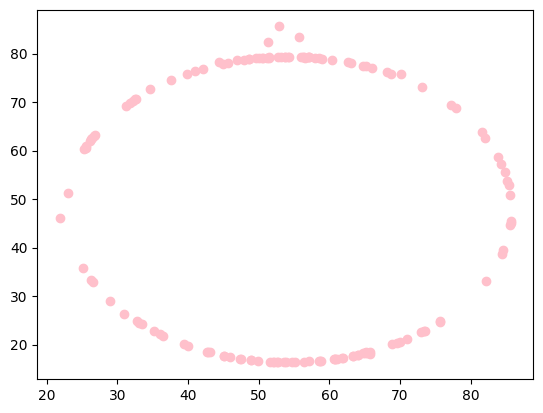

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
files.upload()

df = pd.read_csv('datasaurus.csv')


dino = df[df['dataset'] == 'dino']
dino_mean = df.loc[df['dataset'] == 'dino', 'x'].mean()
dino_median = df.loc[df['dataset'] == 'dino', 'x'].median()
dino_std = df.loc[df['dataset'] == 'dino', 'x'].std()
dino_var = df.loc[df['dataset'] == 'dino', 'x'].var()


print(dino)
print("Mean:",dino_mean)
print("Median:", dino_median)
print("Standard Deviation:", dino_std)
print("Variance:", dino_var)

plt.scatter(dino['x'], dino['y'], color = 'green')
plt.show()
print()


circle = df[df['dataset'] == 'circle']
circle_mean = df.loc[df['dataset'] == 'circle', 'x'].mean()
circle_median = df.loc[df['dataset'] == 'circle', 'x'].median()
circle_std = df.loc[df['dataset'] == 'circle', 'x'].std()
circle_var = df.loc[df['dataset'] == 'circle', 'x'].var()


print(circle)
print("Mean:",circle_mean)
print("Median:", circle_median)
print("Standard Deviation:", circle_std)
print("Variance:", circle_var)

plt.scatter(circle['x'], circle['y'], color = 'pink')
plt.show()
print()



#### Exercise 9
Read the CSV file named `anscombes.csv` into a pandas DataFrame.

Inspect the data and for each dataset calculate for **x** and **y**:
- mean
- median
- standard deviation
- variance

Example print for single dataset:
```
Dataset I:
Mean: 9.0
Median: 9.0
Std: 3.3166247903554
Variance: 11.0

Dataset II:
...
```

In [246]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
files.upload()

df = pd.read_csv('anscombes.csv')

dataset1 = df[df['dataset'] == 'I']


dataset1_mean_x = df.loc[df['dataset'] == 'I', 'x'].mean()
dataset1_median_x = df.loc[df['dataset'] == 'I', 'x'].median()
dataset1_std_x = df.loc[df['dataset'] == 'I', 'x'].std()
dataset1_var_x = df.loc[df['dataset'] == 'I', 'x'].var()



dataset1_mean_y = df.loc[df['dataset'] == 'I', 'y'].mean()
dataset1_median_y = df.loc[df['dataset'] == 'I', 'y'].median()
dataset1_std_y = df.loc[df['dataset'] == 'I', 'y'].std()
dataset1_var_y = df.loc[df['dataset'] == 'I', 'y'].var()



print("Dataset I:")
print()
print("Mean X:", dataset1_mean_x)
print("Median X:", dataset1_median_x)
print("Standard Deviation X:", dataset1_std_x)
print("Variance X:", dataset1_var_x)
print()
print("Mean Y:", dataset1_mean_y)
print("Median Y:", dataset1_median_y)
print("Standard Deviation Y:", dataset1_std_y)
print("Variance Y:", dataset1_var_y)
print()


dataset2 = df[df['dataset'] == 'II']


dataset2_mean_x = df.loc[df['dataset'] == 'II', 'x'].mean()
dataset2_median_x = df.loc[df['dataset'] == 'II', 'x'].median()
dataset2_std_x = df.loc[df['dataset'] == 'II', 'x'].std()
dataset2_var_x = df.loc[df['dataset'] == 'II', 'x'].var()



dataset2_mean_y = df.loc[df['dataset'] == 'II', 'y'].mean()
dataset2_median_y = df.loc[df['dataset'] == 'II', 'y'].median()
dataset2_std_y = df.loc[df['dataset'] == 'II', 'y'].std()
dataset2_var_y = df.loc[df['dataset'] == 'II', 'y'].var()



print("Dataset II:")
print()
print("Mean X:", dataset2_mean_x)
print("Median X:", dataset2_median_x)
print("Standard Deviation X:", dataset2_std_x)
print("Variance X:", dataset2_var_x)
print()
print("Mean Y:", dataset2_mean_y)
print("Median Y:", dataset2_median_y)
print("Standard Deviation Y:", dataset2_std_y)
print("Variance Y:", dataset2_var_y)
print()


dataset3 = df[df['dataset'] == 'III']


dataset3_mean_x = df.loc[df['dataset'] == 'III', 'x'].mean()
dataset3_median_x = df.loc[df['dataset'] == 'III', 'x'].median()
dataset3_std_x = df.loc[df['dataset'] == 'III', 'x'].std()
dataset3_var_x = df.loc[df['dataset'] == 'III', 'x'].var()



dataset3_mean_y = df.loc[df['dataset'] == 'III', 'y'].mean()
dataset3_median_y = df.loc[df['dataset'] == 'III', 'y'].median()
dataset3_std_y = df.loc[df['dataset'] == 'III', 'y'].std()
dataset3_var_y = df.loc[df['dataset'] == 'III', 'y'].var()



print("Dataset III:")
print()
print("Mean X:", dataset3_mean_x)
print("Median X:", dataset3_median_x)
print("Standard Deviation X:", dataset3_std_x)
print("Variance X:", dataset3_var_x)
print()
print("Mean Y:", dataset3_mean_y)
print("Median Y:", dataset3_median_y)
print("Standard Deviation Y:", dataset3_std_y)
print("Variance Y:", dataset3_var_y)
print()


dataset4 = df[df['dataset'] == 'IV']


dataset4_mean_x = df.loc[df['dataset'] == 'IV', 'x'].mean()
dataset4_median_x = df.loc[df['dataset'] == 'IV', 'x'].median()
dataset4_std_x = df.loc[df['dataset'] == 'IV', 'x'].std()
dataset4_var_x = df.loc[df['dataset'] == 'IV', 'x'].var()



dataset4_mean_y = df.loc[df['dataset'] == 'IV', 'y'].mean()
dataset4_median_y = df.loc[df['dataset'] == 'IV', 'y'].median()
dataset4_std_y = df.loc[df['dataset'] == 'IV', 'y'].std()
dataset4_var_y = df.loc[df['dataset'] == 'IV', 'y'].var()



print("Dataset IV:")
print()
print("Mean X:", dataset4_mean_x)
print("Median X:", dataset4_median_x)
print("Standard Deviation X:", dataset4_std_x)
print("Variance X:", dataset4_var_x)
print()
print("Mean Y:", dataset4_mean_y)
print("Median Y:", dataset4_median_y)
print("Standard Deviation Y:", dataset4_std_y)
print("Variance Y:", dataset4_var_y)
print()

Saving anscombes.csv to anscombes (7).csv
Dataset I:

Mean X: 9.0
Median X: 9.0
Standard Deviation X: 3.3166247903554
Variance X: 11.0

Mean Y: 7.500909090909093
Median Y: 7.58
Standard Deviation Y: 2.031568135925815
Variance Y: 4.127269090909091

Dataset II:

Mean X: 9.0
Median X: 9.0
Standard Deviation X: 3.3166247903554
Variance X: 11.0

Mean Y: 7.50090909090909
Median Y: 8.14
Standard Deviation Y: 2.0316567355016177
Variance Y: 4.127629090909091

Dataset III:

Mean X: 9.0
Median X: 9.0
Standard Deviation X: 3.3166247903554
Variance X: 11.0

Mean Y: 7.5
Median Y: 7.11
Standard Deviation Y: 2.030423601123667
Variance Y: 4.12262

Dataset IV:

Mean X: 9.0
Median X: 8.0
Standard Deviation X: 3.3166247903554
Variance X: 11.0

Mean Y: 7.500909090909091
Median Y: 7.04
Standard Deviation Y: 2.0305785113876023
Variance Y: 4.12324909090909



#### Exercise 10
Read the CSV file named `anscombes.csv` into a pandas DataFrame.

Visualize all datasets. Try to set up the 2x2 subplot grid.

Hint: `plt.subplots(2, 2, figsize=(10, 8))`
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

Saving anscombes.csv to anscombes (17).csv


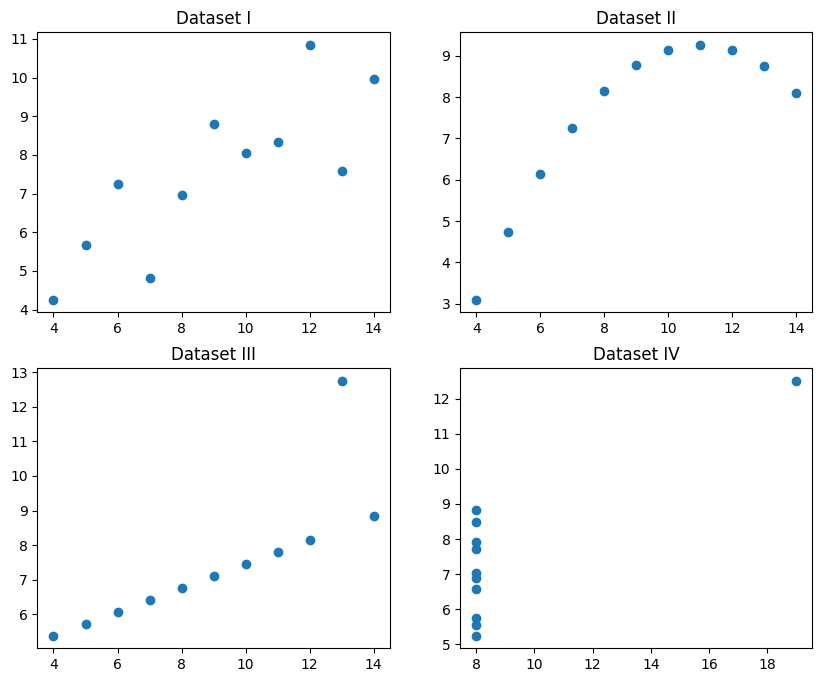

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
files.upload()

df = pd.read_csv('anscombes.csv')

dataset1 = df[df['dataset'] == 'I']
dataset2 = df[df['dataset'] == 'II']
dataset3 = df[df['dataset'] == 'III']
dataset4 = df[df['dataset'] == 'IV']

fig,axis = plt.subplots(2, 2, figsize=(10, 8))

axis[0,0].scatter(dataset1['x'], dataset1['y'])
axis[0,0].set_title('Dataset I')


axis[0,1].scatter(dataset2['x'], dataset2['y'])
axis[0,1].set_title('Dataset II')

axis[1,0].scatter(dataset3['x'], dataset3['y'])
axis[1,0].set_title('Dataset III')


axis[1,1].scatter(dataset4['x'], dataset4['y'])
axis[1,1].set_title('Dataset IV')

plt.show()




#### Exercise 11
What are the conclusions for exercises 8-10?

Exercise 8
After performing all calculations and getting the graphs of circle and dinosaur, only after I realised the Median, Mean, Standard Deviation and Variance are almost identical, which at first suggest the graphs should look almost identical, while they are drastically different. Raw Statistical data can be misleading and that highlights the importance of graphs



Exercise 9 & 10
After performing calculations on all four datasets, it is clearly visible that results of mean, median, standard deviation and variance are almost identical which might have suggested that all four datasets will have very similar values and look almost the same on the graphs. However after creation of graphs it turned out they all look different from each other. Something that got my attention is that all four sets have almost the same standard deviation, however looking at the graphs its clearly visible that dataset III and IV have extreme outliners which in theory should increase SD significally.
well, again we have prove for popular phrase: Lies, damned lies, and statistics